## Seaborn 数据可视化基础

---

#### 介绍

Matplotlib 是支持 Python 语言的开源绘图库，因为其支持丰富的绘图类型、简单的绘图方式以及完善的接口文档，深受 Python 工程师、科研学者、数据工程师等各类人士的喜欢。Seaborn 是以 Matplotlib 为核心的高阶绘图库，无需经过复杂的自定义即可绘制出更加漂亮的图形，非常适合用于数据可视化探索。

#### 知识点

- 关联图
- 类别图
- 分布图
- 回归图
- 矩阵图
- 组合图

---

### Seaborn 介绍

Matplotlib 应该是基于 Python 语言最优秀的绘图库了，但是它也有一个十分令人头疼的问题，那就是太过于复杂了。3000 多页的官方文档，上千个方法以及数万个参数，属于典型的你可以用它做任何事，但又无从下手。尤其是，当你想通过 Matplotlib 调出非常漂亮的效果时，往往会伤透脑筋，非常麻烦。

Matplotlib 应该是基于 Python 语言最优秀的绘图库了，但是它也有一个十分令人头疼的问题，那就是太过于复杂了。3000 多页的官方文档，上千个方法以及数万个参数，属于典型的你可以用它做任何事，但又无从下手。尤其是，当你想通过 Matplotlib 调出非常漂亮的效果时，往往会伤透脑筋，非常麻烦。

<img width='700px' src="https://doc.shiyanlou.com/document-uid214893labid3264timestamp1501118752821.png">

Seaborn 具有如下特点：

*  内置数个经过优化的样式效果。
*  增加调色板工具，可以很方便地为数据搭配颜色。
*  单变量和双变量分布绘图更为简单，可用于对数据子集相互比较。
*  对独立变量和相关变量进行回归拟合和可视化更加便捷。
*  对数据矩阵进行可视化，并使用聚类算法进行分析。
*  基于时间序列的绘制和统计功能，更加灵活的不确定度估计。
*  基于网格绘制出更加复杂的图像集合。

除此之外， Seaborn 对 Matplotlib 和 Pandas 的数据结构高度兼容 ，非常适合作为数据挖掘过程中的可视化工具。

### 快速优化图形

当我们使用 Matplotlib 绘图时，默认的图像样式算不上美观。此时，就可以使用 Seaborn 完成快速优化。下面，我们先使用 Matplotlib 绘制一张简单的图像。

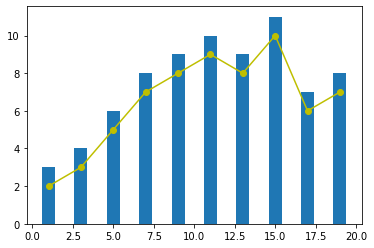

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(1, 19, 10, endpoint=True).tolist()
y_bar = [3, 4, 6, 8, 9, 10, 9, 11, 7, 8]
y_line = [2, 3, 5, 7, 8, 9, 8, 10, 6, 7]

x
plt.bar(x, y_bar)
plt.plot(x, y_line, '-o', color='y')

使用 Seaborn 完成图像快速优化的方法非常简单。只需要将 Seaborn 提供的样式声明代码 `sns.set()` 放置在绘图前即可。

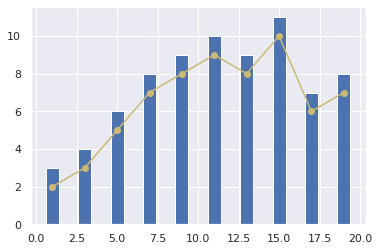

In [6]:
import seaborn as sns

sns.set() # 声明使用 Seaborn 样式

plt.bar(x, y_bar)
plt.plot(x, y_line, '-o', color='y')

我们可以发现，相比于 Matplotlib 默认的纯白色背景，Seaborn 默认的浅灰色网格背景看起来的确要细腻舒适一些。而柱状图的色调、坐标轴的字体大小也都有一些变化。

`sns.set()` 的默认参数为：

```python
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
```

其中：
- `context=''` 参数控制着默认的画幅大小，分别有 `{paper, notebook, talk, poster}` 四个值。其中，`poster > talk > notebook > paper`。
- `style=''` 参数控制默认样式，分别有 `{darkgrid, whitegrid, dark, white, ticks}`，你可以自行更改查看它们之间的不同。
- `palette=''` 参数为预设的调色板。分别有 `{deep, muted, bright, pastel, dark, colorblind}` 等，你可以自行更改查看它们之间的不同。
- 剩下的 `font=''` 用于设置字体，`font_scale=` 设置字体大小，`color_codes=` 不使用调色板而采用先前的 `'r'` 等色彩缩写。

### Seaborn 绘图 API

Seaborn 一共拥有 50 多个 API 类，相比于 Matplotlib 数千个的规模，可以算作是短小精悍了。其中，根据图形的适应场景，Seaborn 的绘图方法大致分类 6 类，分别是：关联图、类别图、分布图、回归图、矩阵图和组合图。而这 6 大类下面又包含不同数量的绘图函数。

接下来，我们就通过实际数据进行演示，使用 Seaborn 绘制不同适应场景的图形。

#### 关联图

当我们需要对数据进行关联性分析时，可能会用到 Seaborn 提供的以下几个 API。

| 关联性分析 | 介绍 |
|:-----------:|:----------------:|
| relplot | 绘制关系图 |
| scatterplot | 多维度分析散点图 |
| lineplot | 多维度分析线形图 |

[`relplot`](https://seaborn.pydata.org/generated/seaborn.relplot.html) 是 relational plots 的缩写，其可以用于呈现数据之后的关系，主要有散点图和条形图 2 种样式。本次实验，我们使用鸢尾花数据集进行绘图探索。

在绘图之前，先熟悉一下 iris 鸢尾花数据集。数据集总共 150 行，由 5 列组成。分别代表：萼片长度、萼片宽度、花瓣长度、花瓣宽度、花的类别。其中，前四列均为数值型数据，最后一列花的分类为三种，分别是：Iris Setosa、Iris Versicolour、Iris Virginica。

In [11]:
iris = sns.load_dataset("iris", data_home="~/Code/Python/Seaborn", cache=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


此时，我们指定 $x$ 和 $y$ 的特征，默认可以绘制出散点图。

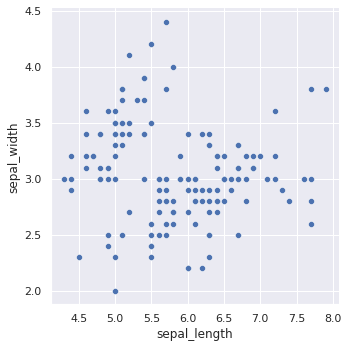

In [12]:
sns.relplot(x="sepal_length", y="sepal_width", data=iris)

但是，上图并不能看出数据类别之间的联系，如果我们加入类别特征对数据进行着色，就更好一些了。

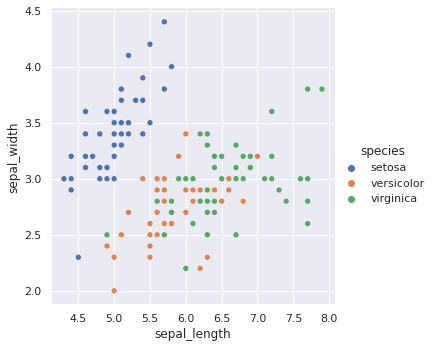

In [13]:
sns.relplot(x="sepal_length", y="sepal_width", hue="species", data=iris)

Seaborn 的函数都有大量实用的参数，例如我们指定 `style` 参数可以赋予不同类别的散点不同的形状。更多的参数，希望大家通过阅读官方文档了解。

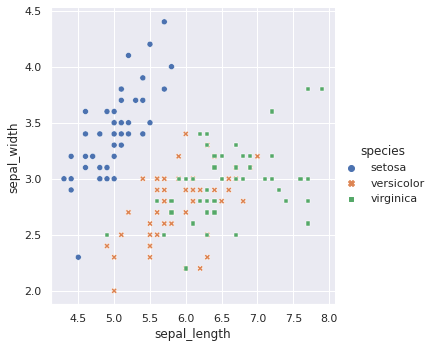

In [14]:
sns.relplot(x="sepal_length", y="sepal_width", hue="species", style="species", data=iris)

不只是散点图，该方法还支持线形图，只需要指定 `kind="line"` 参数即可。线形图和散点图适用于不同类型的数据。线形态绘制时还会自动给出 95% 的置信区间。

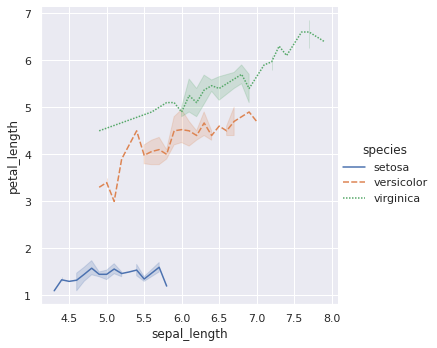

In [15]:
sns.relplot(x="sepal_length", y="petal_length", hue="species", style="species", kind="line", data=iris)

你会发现，上面我们一个提到了 3 个 API，分别是：`relplot`，[`scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) 和 [`lineplot`](https://seaborn.pydata.org/generated/seaborn.lineplot.html)。实际上，你可以把我们已经练习过的 `relplot` 看作是 `scatterplot` 和 `lineplot` 的结合版本。

这里就要提到 Seaborn 中的 API 层级概念，Seaborn 中的 API 分为 Figure-level 和 Axes-level 两种。`relplot` 就是一个 Figure-level 接口，而 `scatterplot` 和 `lineplot` 则是 Axes-level 接口。

Figure-level 和 Axes-level API 的区别在于，Axes-level 的函数可以实现与 Matplotlib 更灵活和紧密的结合，而 Figure-level 则更像是「懒人函数」，适合于快速应用。

例如上方的图，我们也可以使用 `lineplot` 函数绘制，你只需要取消掉 `relplot` 中的 `kind` 参数即可。

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

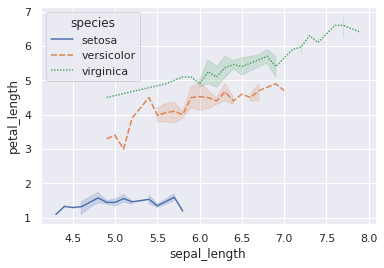

In [16]:
sns.lineplot(x="sepal_length", y="petal_length", hue="species", style="species", data=iris)

#### 类别图

与关联图相似，类别图的 Figure-level 接口是 `catplot`，其为 categorical plots 的缩写。而 `catplot` 实际上是如下 Axes-level 绘图 API 的集合：
- 分类散点图:
    - [`stripplot()`](https://seaborn.pydata.org/generated/seaborn.stripplot.html) (`kind="strip"`)
    - [`swarmplot()`](https://seaborn.pydata.org/generated/seaborn.swarmplot.html) (`kind="swarm"`)

- 分类分布图:
    - [`boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) (`kind="box"`)
    - [`violinplot()`](https://seaborn.pydata.org/generated/seaborn.violinplot.html) (`kind="violin"`)
    - [`boxenplot()`](https://seaborn.pydata.org/generated/seaborn.boxenplot.html) (`kind="boxen"`)

- 分类估计图:
    - [`pointplot()`](https://seaborn.pydata.org/generated/seaborn.pointplot.html) (`kind="point"`)
    - [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) (`kind="bar"`)
    - [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) (`kind="count"`)

下面，我们看一下 `catplot` 绘图效果。该方法默认是绘制 `kind="strip"` 散点图。

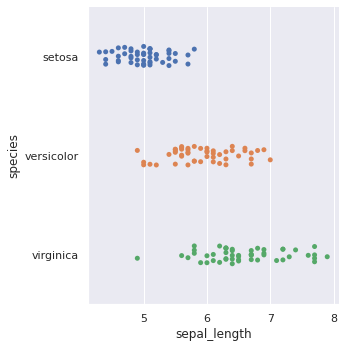

In [18]:
sns.catplot(x="sepal_length", y="species", data=iris)

`kind="swarm"` 可以让散点按照 beeswarm 的方式防止重叠，可以更好地观测数据分布。

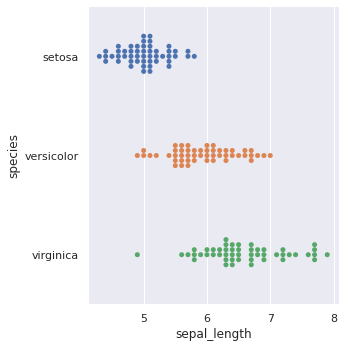

In [19]:
sns.catplot(x="sepal_length", y="species", kind="swarm", data=iris)

同理，`hue=` 参数可以给图像引入另一个维度，由于 iris 数据集只有一个类别列，我们这里就不再添加 `hue=` 参数了。如果一个数据集有多个类别，`hue=` 参数就可以让数据点有更好的区分。

接下来，我们依次尝试其他几种图形的绘制效果。绘制箱线图：

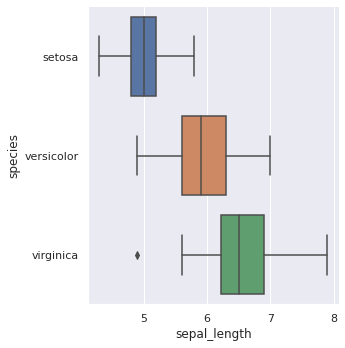

In [20]:
sns.catplot(x="sepal_length", y="species", kind="box", data=iris)

绘制小提琴图：

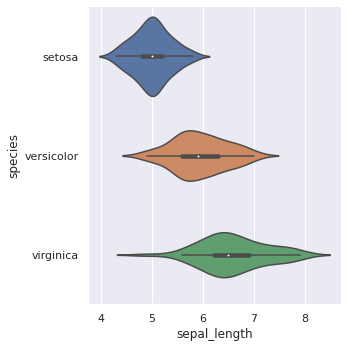

In [21]:
sns.catplot(x="sepal_length", y="species", kind="violin", data=iris)

绘制增强箱线图：

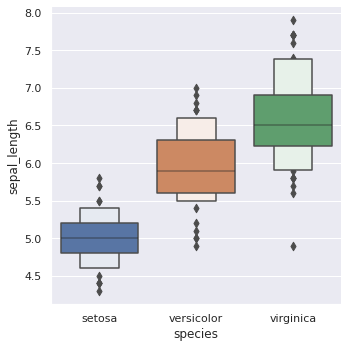

In [22]:
sns.catplot(x="species", y="sepal_length", kind="boxen", data=iris)

绘制点线图：

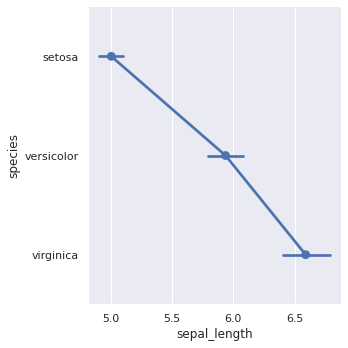

In [24]:
sns.catplot(x="sepal_length", y="species", kind="point", data=iris)

绘制条形图：

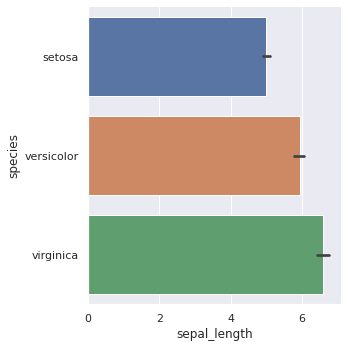

In [25]:
sns.catplot(x="sepal_length", y="species", kind="bar", data=iris)

绘制计数条形图：

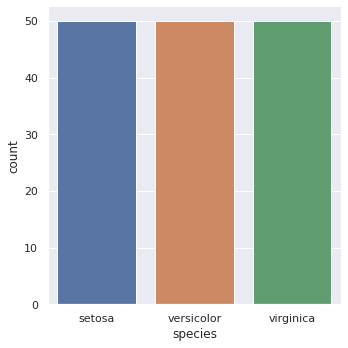

In [26]:
sns.catplot(x="species", kind="count", data=iris)

#### 分布图

分布图主要是用于可视化变量的分布情况，一般分为单变量分布和多变量分布。当然这里的多变量多指二元变量，更多的变量无法绘制出直观的可视化图形。

Seaborn 提供的分布图绘制方法一般有这几个：
[`jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html)，[`pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html)，[`distplot`](https://seaborn.pydata.org/generated/seaborn.distplot.html)，[`kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)。接下来，我们依次来看一下这些绘图方法的使用。

Seaborn 快速查看单变量分布的方法是 `distplot`。默认情况下，该方法将会绘制直方图并拟合核密度估计图。

/home/kingsley/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

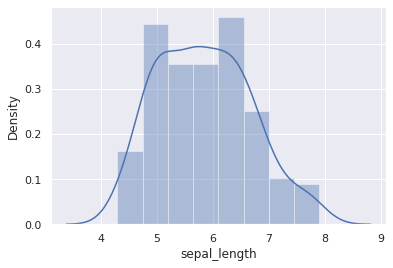

In [27]:
sns.distplot(iris["sepal_length"])

`distplot` 提供了参数来调整直方图和核密度估计图，例如设置 `kde=False` 则可以只绘制直方图，或者 `hist=False` 只绘制核密度估计图。当然，`kdeplot` 可以专门用于绘制核密度估计图，其效果和 `distplot(hist=False)` 一致，但 `kdeplot` 拥有更多的自定义设置。

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

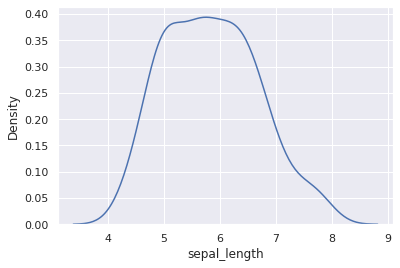

In [28]:
sns.kdeplot(iris["sepal_length"])

`jointplot` 主要是用于绘制二元变量分布图。例如，我们探寻 `sepal_length` 和 `sepal_width` 二元特征变量之间的关系。

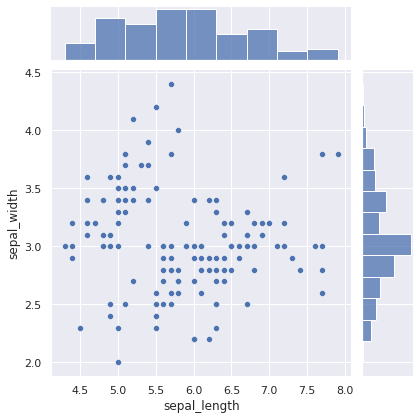

In [29]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)

`jointplot` 并不是一个 Figure-level 接口，但其支持 `kind=` 参数指定绘制出不同样式的分布图。例如，绘制出核密度估计对比图。

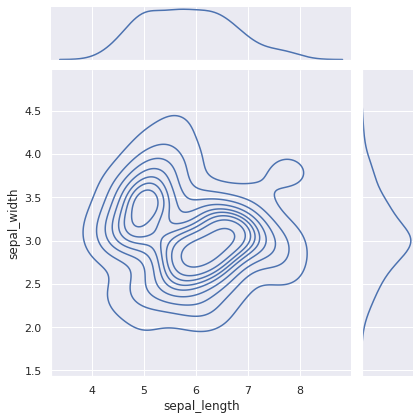

In [30]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde")

六边形计数图：

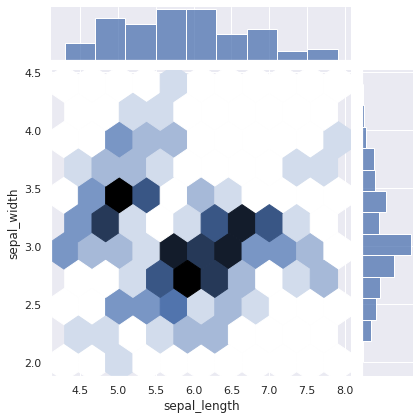

In [31]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="hex")

回归拟合图：

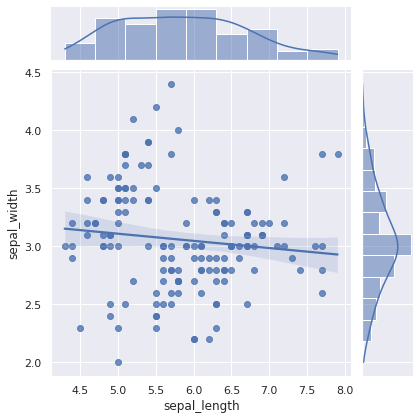

In [32]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="reg")

最后要介绍的 `pairplot` 更加强大，其支持一次性将数据集中的特征变量两两对比绘图。默认情况下，对角线上是单变量分布图，而其他则是二元变量分布图。

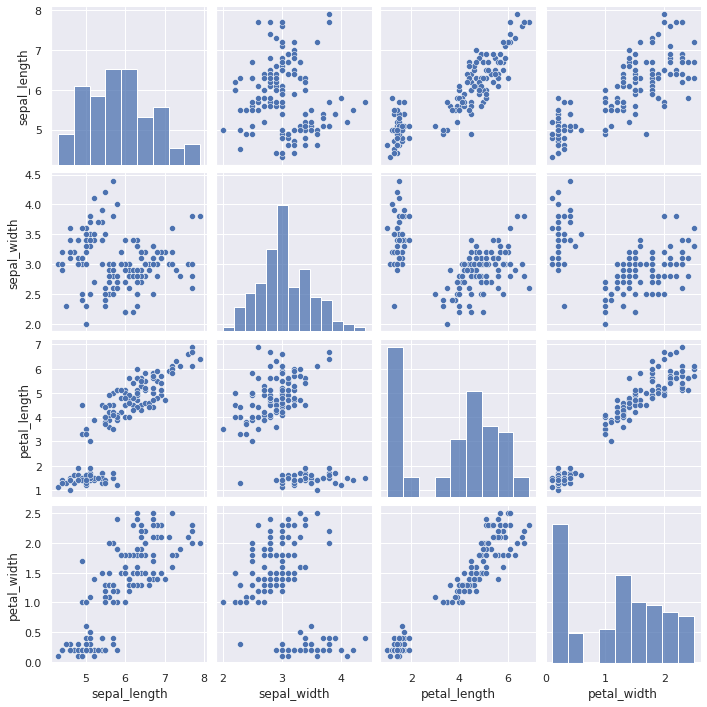

In [33]:
sns.pairplot(iris)

此时，我们引入第三维度 `hue="species"` 会更加直观。

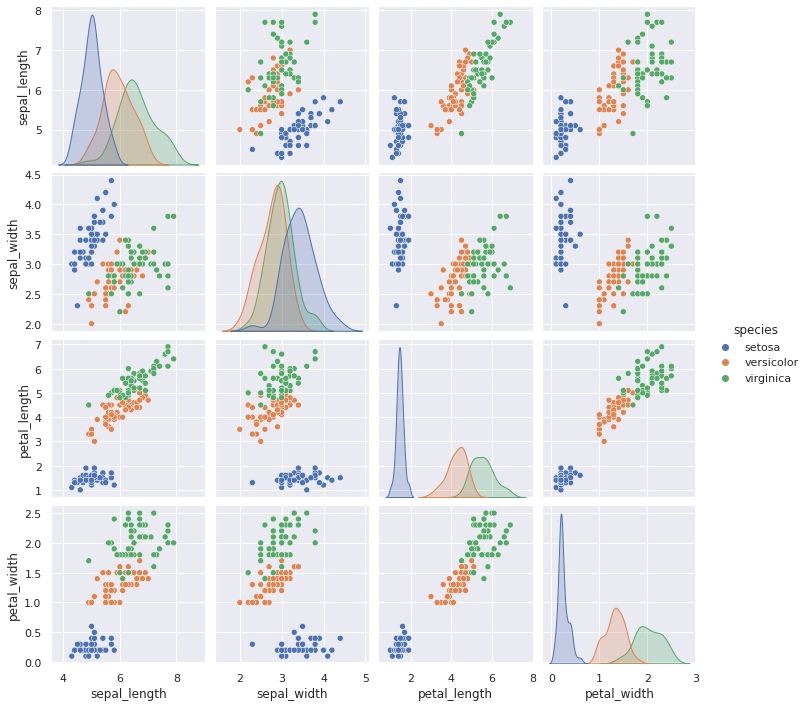

In [34]:
sns.pairplot(iris, hue="species")

#### 回归图

接下来，我们继续介绍回归图，回归图的绘制函数主要有：[`lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) 和 [`regplot`](https://seaborn.pydata.org/generated/seaborn.regplot.html)。

`regplot` 绘制回归图时，只需要指定自变量和因变量即可，`regplot` 会自动完成线性回归拟合。

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

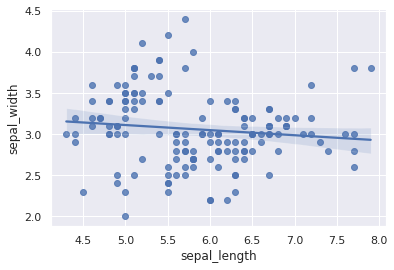

In [35]:
sns.regplot(x="sepal_length", y="sepal_width", data=iris)

`lmplot` 同样是用于绘制回归图，但 `lmplot` 支持引入第三维度进行对比，例如我们设置 `hue="species"`。

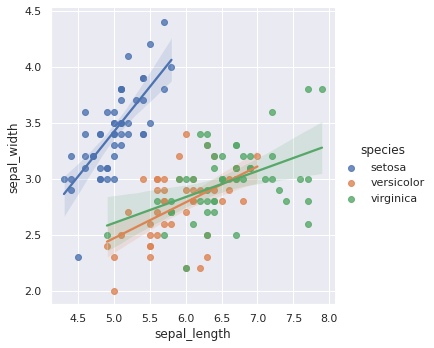

In [36]:
sns.lmplot(x="sepal_length", y="sepal_width", hue="species", data=iris)

#### 矩阵图

矩阵图中最常用的就只有 2 个，分别是：[`heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) 和 [`clustermap`](https://seaborn.pydata.org/generated/seaborn.clustermap.html)。

意如其名，`heatmap` 主要用于绘制热力图。

<AxesSubplot:>

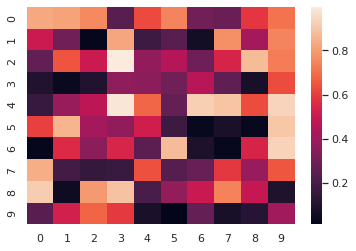

In [37]:
sns.heatmap(np.random.rand(10, 10))

热力图在某些场景下非常实用，例如绘制出变量相关性系数热力图。

除此之外，`clustermap` 支持绘制 [层次聚类](https://baike.baidu.com/item/%E5%B1%82%E6%AC%A1%E8%81%9A%E7%B1%BB%E6%96%B9%E6%B3%95) 结构图。如下所示，我们先去掉原数据集中最后一个目标列，传入特征数据即可。当然，你需要对层次聚类有所了解，否则很难看明白图像表述的含义。

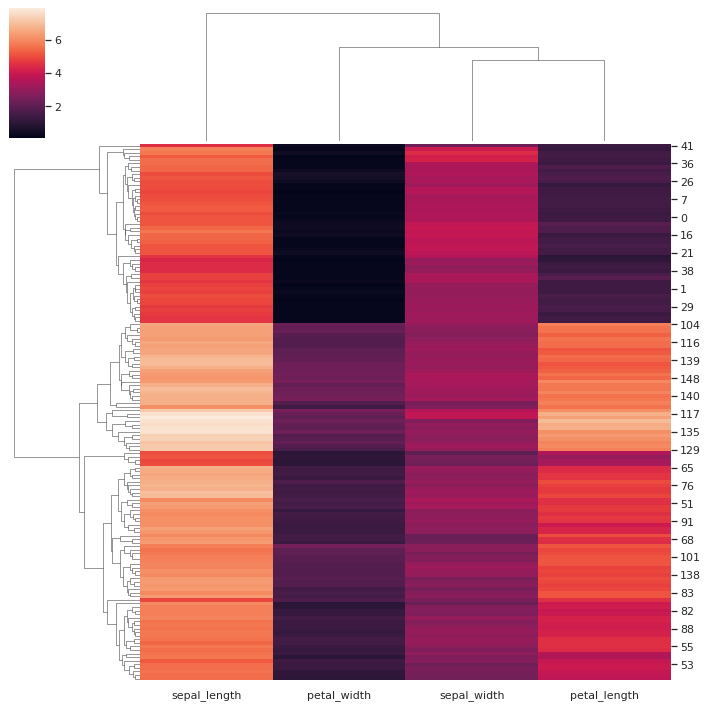

In [38]:
iris.pop("species")
sns.clustermap(iris)

如果你浏览官方文档，就会发现 Seaborn 中还存在大量以大些字母开始的类，例如 `JointGrid`，`PairGrid` 等。实际上这些类只是其对应小写字母的函数 `jointplot`，`pairplot` 的进一步封装。当然，二者可能稍有不同，但并没有本质的区别。

除此之外，[官方文档](https://seaborn.pydata.org/api.html) 中还有关于 [样式控制](https://seaborn.pydata.org/api.html#style-control) 和 [色彩自定义](https://seaborn.pydata.org/api.html#color-palettes) 等一些辅助组件的介绍。对于这些 API 的应用没有太大的难点，重点需要勤于练习。